# Lesson 13, Workalong 02: Plotting geospatial data

This workalong shows how to use `rioxarray` to read a raster file (a GeoTIFF in this case) to add topography to our plot.  It also shows some tricks for getting good-looking topo plots.

In [1]:
""" Import libraries """
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
from osgeo import gdal
import cartopy
import numpy as np
import cmocean

mpl.style.use('seaborn-v0_8-poster')

In [2]:
""" Load the earthquake data from the earlier exercise. """
shapefile_path = "CA_earthquake.zip\\CA_earthquake.shp"

# load the shapefile
CA_eq_gdf = gpd.read_file(shapefile_path)
CA_eq_gdf.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontal,depthError,magError,magNst,status,locationSo,magSource,geometry
0,1956-02-09 14:32:41.910000+00:00,31.832167,-116.230833,6.0,6.80,ms,6.0,339.0,0.9244,0.10,...,"34km ENE of Maneadero, B.C., MX",earthquake,4.34,31.61,NaN,0.0,reviewed,ci,ci,POINT (-10477288.255 3404569.259)
1,1915-11-21 00:13:42.980000+00:00,31.932000,-114.945000,10.0,6.57,mw,NaN,NaN,NaN,NaN,...,10 km SSE of Ejido Doctor Alberto Oviedo Mota ...,earthquake,NaN,3.90,0.400,NaN,reviewed,iscgem,iscgem,POINT (-10357724.394 3415249.468)
2,1954-11-12 12:26:53.750000+00:00,31.934333,-116.312667,6.0,6.09,ml,9.0,325.0,NaN,0.31,...,"30km ENE of Ensenada, B.C., MX",earthquake,9.83,31.61,0.223,5.0,reviewed,ci,ci,POINT (-10480878.523 3415499.084)
3,1934-12-30 13:52:02.690000+00:00,32.000000,-114.900000,6.0,6.33,ml,6.0,322.0,2.1690,1.23,...,"24km SSE of Estacion Coahuila, B.C., MX",earthquake,99.00,31.61,0.032,7.0,reviewed,ci,ci,POINT (-10351170.071 3422524.058)
4,1927-01-01 09:13:36.770000+00:00,32.153000,-115.764000,10.0,6.08,mw,NaN,NaN,NaN,NaN,...,"49 km SSE of Rumorosa, Mexico",earthquake,NaN,3.50,0.320,NaN,reviewed,iscgemsup,iscgemsup,POINT (-10423311.096 3438891.620)


In [3]:
""" Load the topo / bathymetry data. """

# set the filepath
topo_bathy_path = "https://github.com/taobrienlbl/advanced_earth_science_data_analysis/raw/09188e9e6a0cf230f8473c0ae95d2e1b9079df3a/lessons/13_geospatial_intro/data/western_us_topo_bathy_subset.tiff"

# read the topography raster data
topo_ds = gdal.Open(topo_bathy_path, gdal.GA_ReadOnly)
topo_subds = topo_ds.GetSubDatasets()
print(topo_subds)

[]


In [4]:
# check the meta data
topo_meta = topo_ds.GetMetadata()
print(topo_meta)

{'AREA_OR_POINT': 'Area', 'DataType': 'Generic'}


In [5]:
# get the width, height and band number of the topography data
nWidth = topo_ds.RasterXSize
nHeight = topo_ds.RasterYSize
nBandNum = topo_ds.RasterCount
print(nWidth, nHeight, nBandNum)

703 673 1


In [6]:
# get the projection and georeferencing transform information of the topography data
topo_proj = topo_ds.GetProjection()
print(topo_proj)
topo_GeoTransform = topo_ds.GetGeoTransform()
print(topo_GeoTransform)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
(-126.56667007429421, 0.016666671619613663, 0.0, 43.81667, 0.0, -0.01666667161961366)


In [7]:
# read the topography data into numpy array
topo_data = topo_ds.ReadAsArray()
print(topo_data.shape)
print(type(topo_data))

(673, 703)
<class 'numpy.ndarray'>


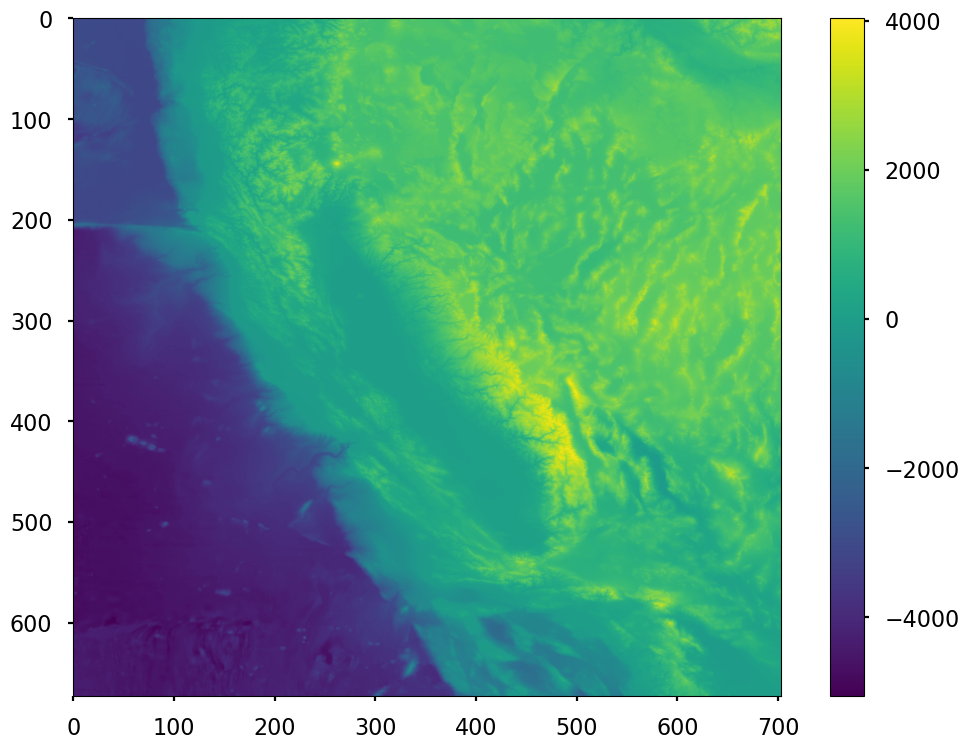

In [12]:
# check the topography data by plotting the grid
fig, ax = plt.subplots()
cplt = ax.imshow(topo_data[:,:])
fig.colorbar(cplt)

plt.show()

In [ ]:
""" Load the state boundary data. """


In [ ]:
""" Generate a plot of earthquake locations on top of the topography / bathymetry data. """
